# 4 - Training Models

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

This chapter covers the algorithms machine learning models use to train on data.

First is a linear regression model, one of the simplest models there is. There are two very different ways to train it.
- Using a direct "closed-form" equation that directly computes the model parameters that best fit the model to the training set (i.e. the model parameters that minimize the cost function over the training set).
- Using an iterative optimization approach, called Gradient Descent (GD) that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. There are a few variants of Gradient Descent that will be uses again and again in neural networks: Batch GD, Mini-batch GD, and Stochastic GD.

Next is a Polynomial Regression, a more complex model that can fit non-linear datasets. Since this model has more parameters than Linear Regression, it is more prone to overfitting the training data; there are methods to detect whether or not this is the case, using learning curves. There are also several regularization techniques that can reduce the risk of overfitting the training set.

Lastly are Logistic Regression and Softmax Regression, methods commonly used for classification tasks.

> Most of these equations use linear algebra and calculus. To understand the equations requires knowledge of vectors and matrices, how to transpose them, multiply them, and inverse them, and what partial derivatives are.

## Linear Regression
A Linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*). The equation is as follows:

$$\hat{y} = \theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\dots+\theta_{n}x_{n} $$
- $\hat{y}$ is the predicted value
- $n$ is the number of features
- $x_i$ is the $i^{th}$ feature value
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_{1},\theta_{2},\dots,\theta_{n}$

This can be written much more concisely using a vectorized form:

$$\hat{y} = h_\theta \textbf{(x)} = \theta \cdot \textbf{x}$$

- $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
- $\textbf{x}$ is the instance's *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\theta \cdot \textbf{x}$ is the dot product of the vector $\theta$ and $\textbf{x}$, which is of course equal to $\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\cdot+\theta_{n}x_n$
- $h_{\theta}$ is hypothesis function, using the model parameters $\theta$.

> In Machine Learning, vectors are often represented as *column vectors*, which are 2D arrays with a single column. If $\theta$ and $\textbf{x}$ are column vectors, then the prediction is: $\hat{y} = \theta^{\textbf{T}}_{\textbf{x}}$, where $\theta^{T}$ is the *transpose* of $\theta$ (a row vector instead of a column vector) and $\theta^{\textbf{T}}_{\textbf{x}}$ is the matrix multiplication of $\theta^{\textbf{T}}$ and $\textbf{x}$. If is of course the same prediction, except it is now represented as a single cell matrix rather than a scalar value. In this book we will use this notation to avoid switching between dot products and matrix multiplication.

When training this model, the parameters need to be set so that the model best fits the training set. First there needs to be a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the Root Square Error (RMSE). Therefor, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).

The MSE of a Linear Regression hypothesis $h_\theta$ on a training set $\textbf{X}$ is calculated using the equation below.

$$\text{MSE}(\textbf{X},h_{\theta})= \frac{1}{m}\sum_{i=1}^{m}(\theta^{T}\mathbf{x}^{(i)}-y^{(i)})^2$$

Instead of an $h$ there is a $h_\theta$  in order to make it clear that the model is parameterized by the vector $\theta$. To simplify notation, MSE($\theta$) will be used.

### The Normal Equation
To find the value of $\theta$ that minimizes the cost function, there is a *closed-form solution* - in other words, a mathematical equation that gives the result directly. This is called the *Normal Equation*

$$\hat{\theta} = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- $\textbf{y}$ is the vector of target values containing $y^{(1)}$ to $y^{m}$.

Below is code that generates some linear-looking data to test this equation:

In [5]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


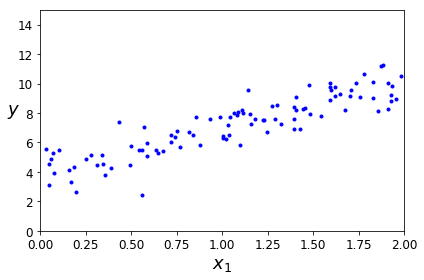

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

$\hat{\theta}$ can be computed using the Normal Equation. Use the `inv()` function from NumPy's Linear Algebra module `(np.linalg)` to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [7]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function used to generate the data $y=4+3x_1+ \text{Gaussian noise}$. Below is what the equation has found:

In [8]:
theta_best

array([[3.86501051],
       [3.13916179]])

The best outcome is would have been if $\theta_0=4$ and $\theta_1=3$ instead of $\theta_0=3.865$ and $\theta_1=3.139$. This is close enough, but the noise made it impossible to recover the exat parameters of the original function.

Now predictions can be made using $\hat{\theta}$:

In [11]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict
#should be 4, 10

array([[ 3.86501051],
       [10.14333409]])

Below is a plot of the predictions:

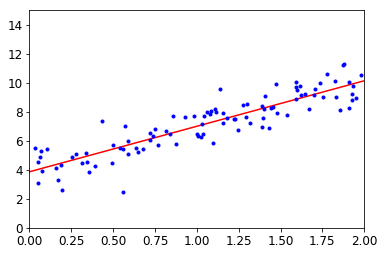

In [12]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Linear regressions ins Scikit-Learn are simple:

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [15]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (least squares), which can be called directly:

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86501051],
       [3.13916179]])

This function computes $\hat{\theta} = \textbf{X}^{+}\textbf{y}$, where $\textbf{X}^+$ is the *pseudoinverse* of $\textbf{X}$ (specifically the Moore-Penrose inverse). This can be computed directly with `np.linalg.pinv()`:

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set $\textbf{X}$ into the matrix multiplication of three matrices $\textbf{U}$ $\textbf{Σ}$ $\textbf{V}^t$ (see `numpy.linalg.svd())`. The pseudoinverse is computed as $\textbf{X}^{+}=\textbf{V}\textbf{Σ}^{+}\textbf{U}^t$. To compute the matrix $\textbf{Σ}^{+}$, the algorithm takes $\textbf{Σ}$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the noon-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: the Normal Equation may not work if the matrix $\textbf{X}^T \textbf{X}$ is not invertible (i.e. singular), such as if $m<n$ or if some features are redundant, but the pseudoinverse is always defined.

### Computational Complexity
The Normal Equation computes the inverse of $\textbf{X}^T \textbf{X}$, which is an $(n+1) \times (n+1)$ matrix (where $n$ is the number of features). The *computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$ (depending on the implementation). In other words, if the number of features are doubled, the computation time is multiplied by roughly $2^{2.4}=5.3$ to $2^{3}=8$.

The SVD approach used by Scikit-Learn's `LinearRegression` class is about $O(n^{2})$. If you double the number of features, you multiply the computation time by roughly 4.

> Both the Normal Equation and the SVD approach get very slow when the number of features grows large (e.g. 100,000). On the positive side, both are linear with regards to the number of instances in the training set (they are $O(m)$), so they handle large training sets efficiently, provided they can fit in memory.

Once a Linear Regression model is trained (using the Normal Equation or any other algorithm), predictions are very fast: the computational complexity is linear with regards to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will just take roughly twice as much time.

There are other different ways to train Linear Regression models better suited for cases where there are a large number of features, or too many training instances to fit in memory.

## Gradient Descent
*Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Gradient Descent measures the local gradient of the  error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, the minimum has been reached.

Concretely, the process starts by filling $\theta$ with random values (this is called *random initilization$), and then improving it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm *converges* to a minimum. This process is illustrated below:

![title](GradientDescent.png)

An important parameter in Gradient Descent is the size of the steps, determined by the *learning rate* hyperparameter. If the learning rate is too small, then the algorithm will have to go thorugh many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, it might jump across the valley and end up on the other side, possibly even higher up than the previous iteration. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

![title](GradientStep.jpeg)

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult. The images below illustrates the two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, it will converge to a *local minimum*, which is not as good as the *global minimum*. If it starts on the right, then it will take a very long time to cross the plateau, and if it stops too early it will never reach the global minimum.

![title](GradientLocal.png)

The MSE cost function for a Linear Regression model happens to be a *convex function*, which means that for any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close to the global minimum (given enough time and if the learning rate is not too high)

The cost function has the shape of a bowl, bit it can be elongated bowl if the features have very different scales. The figure below shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left) , and on a training set where feature 1 has much smaller values than feature 2 (on the right).

![title](GDFeatureScale.png)

On the left, the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

>